<a href="https://colab.research.google.com/github/TamilSelvan1667/Mentorness/blob/main/FastTagFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
Fastag = pd.read_csv('FastagFraudDetection.csv')
Fastag.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
Fastag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
Fastag.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
Fastag= Fastag.drop(columns=['Transaction_ID','Timestamp','Vehicle_Type','FastagID','TollBoothID','Vehicle_Dimensions','Geographical_Location','Vehicle_Speed','Vehicle_Plate_Number'],axis=1)

In [ ]:
Fastag.head()

,Lane_Type,Transaction_Amount,Amount_paid,Fraud_indicator
0,Express,350,120,Fraud
1,Regular,120,100,Fraud
2,Regular,0,0,Not Fraud
3,Regular,350,120,Fraud
4,Express,140,100,Fraud


In [ ]:
#Label encoding for column Lane_Type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Fastag['Lane_Type'] = le.fit_transform(Fastag['Lane_Type'])
#label encoding for Fraud_indicator
Fastag['Fraud_indicator'] = le.fit_transform(Fastag['Fraud_indicator'])

In [ ]:
Fastag.head()

,Lane_Type,Transaction_Amount,Amount_paid,Fraud_indicator
0,0,350,120,0
1,1,120,100,0
2,1,0,0,1
3,1,350,120,0
4,0,140,100,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

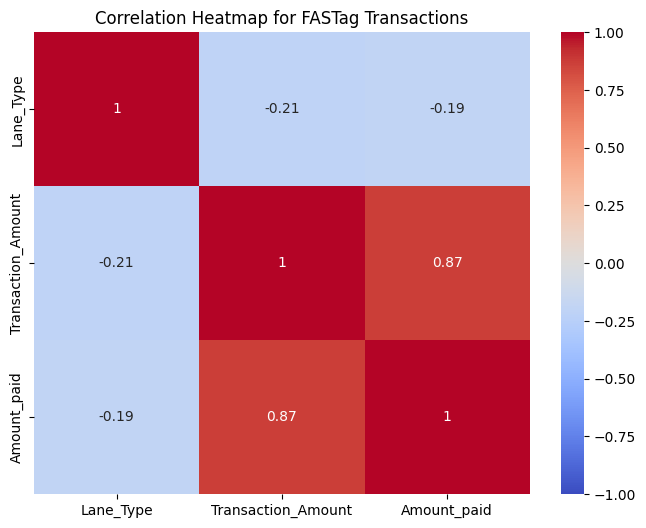

In [ ]:
correlation_matrix = Fastag[['Lane_Type', 'Transaction_Amount', 'Amount_paid']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for FASTag Transactions')
plt.show()

In [ ]:
x=Fastag.drop(columns=['Fraud_indicator'],axis=1)
y=Fastag['Fraud_indicator']

In [ ]:
Fastag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Lane_Type           5000 non-null   int64
 1   Transaction_Amount  5000 non-null   int64
 2   Amount_paid         5000 non-null   int64
 3   Fraud_indicator     5000 non-null   int64
dtypes: int64(4)
memory usage: 156.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Logistic Regression: {accuracy * 100}')

Accuracy for Logistic Regression: 98.1


In [ ]:
#support vector machine
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
svc_pred = svm_model.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f'Accuracy for SVM: {svc_accuracy * 100}')

Accuracy for SVM: 98.1


In [ ]:
#decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_model_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_model_pred)
print(f'Accuracy for Decision Tree: {dt_accuracy * 100}')


Accuracy for Decision Tree: 100.0


In [ ]:
Lane_Type=int(input("Enter Lane_Type (0 for Express, 1 for Regular): "))
Transaction_amount=int(input("Enter Transaction amount:"))
Amount_paid=int(input("Enter Amount paid:"))

input_data = ([[Lane_Type,Transaction_amount,Amount_paid]])
prediction = dt_model.predict(input_data)

print(prediction)

Enter Lane_Type (0 for Express, 1 for Regular): 1
Enter Transaction amount:200
Enter Amount paid:200
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
